In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_prep import *

plt.style.use('ggplot')

%matplotlib inline

In [13]:
data = pd.read_pickle('../junyi_df.pickle')

In [14]:
data['time_done'] = pd.to_datetime(data['time_done'],unit='us')

In [15]:
data.drop(columns=['exercise', 'problem_type', 'problem_number', 'time_taken_attempts', 'hint_time_taken_list'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925992 entries, 0 to 25925991
Data columns (total 12 columns):
user_id               int64
topic_mode            bool
suggested             bool
review_mode           bool
time_done             datetime64[ns]
time_taken            int64
correct               bool
count_attempts        int64
hint_used             bool
count_hints           int64
earned_proficiency    bool
points_earned         int64
dtypes: bool(6), datetime64[ns](1), int64(5)
memory usage: 1.3 GB


In [17]:
data.columns

Index(['user_id', 'topic_mode', 'suggested', 'review_mode', 'time_done',
       'time_taken', 'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned'],
      dtype='object')

In [19]:
data = change_bool(data)

### Looking at weekly usage

In [11]:
data.groupby(['user_id', 'week']).mean().sort_values(by=['user_id','week'], ascending=[True,True])

,,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
user_id,week,,,,,,,,,,
0,45,0.000000,0.875000,0.000000,18.125000,0.875000,1.250000,0.125000,0.125000,0.000000,196.875000
1,14,0.333333,0.555556,0.000000,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444
2,28,0.589744,0.564103,0.000000,27.102564,0.923077,1.769231,0.076923,0.102564,0.076923,159.000000
3,35,0.005495,0.076923,0.000000,28.752747,0.917582,1.093407,0.016484,0.065934,0.027473,30.032967
4,8,0.000000,0.625000,0.000000,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000
5,23,1.000000,0.572581,0.000000,10.774194,0.846774,1.217742,0.056452,0.056452,0.096774,174.895161
6,48,0.200000,0.600000,0.000000,32.600000,0.800000,1.000000,0.000000,0.000000,0.000000,180.000000
7,43,0.000000,0.000000,0.000000,213.000000,0.000000,1.833333,1.000000,3.166667,0.000000,0.000000
8,26,0.648352,0.527473,0.000000,5.516484,0.835165,1.109890,0.076923,0.494505,0.076923,135.571429


In [2]:
data = (data[(data['time_done']>='1/1/2014')& (data['time_done']<='12/31/2014')])

In [21]:
data.head()

,user_id,topic_mode,suggested,review_mode,time_done,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
0,12884,0,0,0,2015-01-08 11:00:10.324490,4,0,2,0,0,0,0
1,239464,0,0,0,2014-06-18 13:33:20.836660,2,1,1,0,0,0,14
2,147359,0,0,0,2014-12-18 08:18:15.540340,16,1,1,0,0,0,75
3,158155,0,0,0,2014-05-19 03:17:24.264040,2,1,1,0,0,0,75
4,147151,1,1,0,2013-10-24 21:41:45.730160,4,1,1,0,0,0,225


### Looking at Total Activities Trid and Range of User Activity

In [22]:
data['user_id'].value_counts().describe()

count    247606.000000
mean        104.706639
std         385.269222
min           1.000000
25%           3.000000
50%          10.000000
75%          50.000000
max       22067.000000
Name: user_id, dtype: float64

In [23]:
total_usage = data['user_id'].value_counts().sort_index()

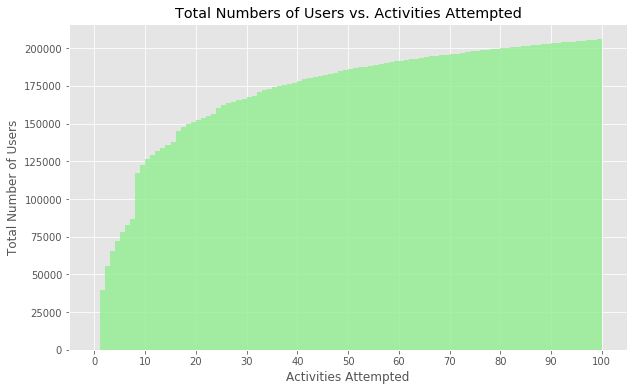

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(total_usage, bins=100, range=(0,100), histtype='stepfilled', cumulative=True, alpha=.8, color='lightgreen')
ax.set_title('Total Numbers of Users vs. Activities Attempted')
ax.set_xlabel('Activities Attempted', size=12)
ax.set_ylabel('Total Number of Users', size=12)
ax.set_xticks(range(0,110,10))
fig.savefig('images/users_vs_activities.png')

In [17]:
len(total_usage)

215719

In [31]:
users = data.groupby('user_id')

In [32]:
rng = (users['time_done'].max() - users['time_done'].min()).dt.days

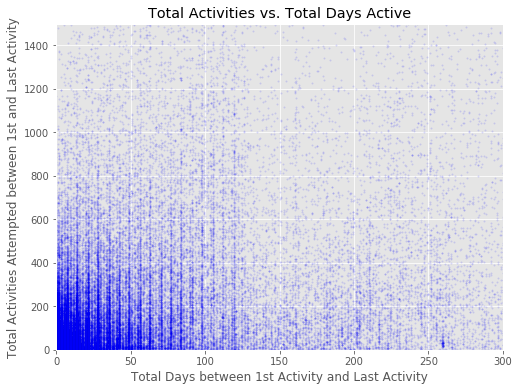

In [41]:
fig, ax = plt.subplots(figsize =(8,6))

ax.scatter(rng, total_usage, s=2, alpha=.1, color='blue')
ax.set_ylim(0,1500)
ax.set_xlim(0,300)
ax.set_title('Total Activities vs. Total Days Active')
ax.set_xlabel('Total Days between 1st Activity and Last Activity', size=12)
ax.set_ylabel('Total Activities Attempted between 1st and Last Activity', size=12)
fig.savefig('images/days_vs_activities.png')

In [23]:
len(rng)

215719

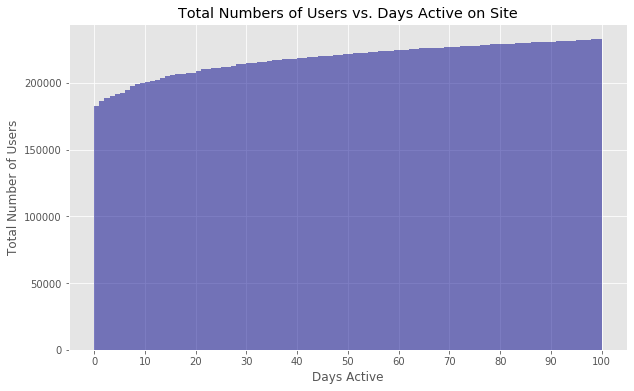

In [43]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(rng, bins=100, range=(0,100), histtype='stepfilled', cumulative=True, alpha=.5, color='darkblue')
ax.set_title('Total Numbers of Users vs. Days Active on Site')
ax.set_xlabel('Activities Attempted', size=12)
ax.set_xlabel('Days Active')
ax.set_ylabel('Total Number of Users')
ax.set_xticks(range(0,110,10))
fig.savefig('images/users_vs_active_days.png')

In [24]:
rng.describe()

count    215719.000000
mean         17.028987
std          49.257481
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         363.000000
Name: time_done, dtype: float64

In [25]:
rng[rng>=7].describe()

count    47263.000000
mean        77.067008
std         80.348035
min          7.000000
25%         20.000000
50%         45.000000
75%        102.000000
max        363.000000
Name: time_done, dtype: float64

In [26]:
week_plus_index = rng[rng>7].index

(array([3477., 2154., 1620., 1308., 1180., 1875., 3457., 1046.,  851.,
         827.,  729.,  684., 1230., 1937.,  629.,  521.,  478.,  396.,
         474.,  828., 1532.,  443.,  419.,  356.,  382.,  323.,  751.,
        1179.,  406.,  293.,  298.,  299.,  292.,  507.,  916.,  311.,
         312.,  226.,  211.,  272.,  431.,  727.,  257.,  240.,  227.,
         250.,  260.,  353.,  626.,  285.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <a list of 50 Patch objects>)

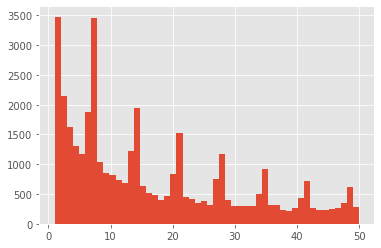

In [45]:
usage_index = ((total_usage>1))
plt.hist(rng[usage_index], bins=50, range=(1,50), label='Usage on Last Active Days') 

In [29]:
usage = data.groupby(['user_id']).mean().sort_values(by=['user_id'], ascending=[True])

In [30]:
usage_by_week = data.groupby(['user_id', 'week']).mean().sort_values(by=['user_id','week'], ascending=[True,True])

In [31]:
usage_by_week.head()

,,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
user_id,week,,,,,,,,,,
0,45,0.000000,0.875000,0.0,18.125000,0.875000,1.250000,0.125000,0.125000,0.000000,196.875000
1,14,0.333333,0.555556,0.0,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444
2,28,0.589744,0.564103,0.0,27.102564,0.923077,1.769231,0.076923,0.102564,0.076923,159.000000
3,35,0.005495,0.076923,0.0,28.752747,0.917582,1.093407,0.016484,0.065934,0.027473,30.032967
4,8,0.000000,0.625000,0.0,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000


In [42]:
rng = (users['time_done'].max() - users['time_done'].min()).dt.days

### ExploringNew Users vs. Total Users by Month

In [53]:
new_users = data[['user_id', 'time_done']].groupby('user_id').min()

In [54]:
new_users_month = new_users['time_done'].dt.month

In [60]:
userinfo = pd.DataFrame(new_users_month.value_counts().sort_index())

In [64]:
userinfo['%_new_users'] = userinfo['time_done']/userinfo['total']

In [62]:
userinfo['total'] = total_users

In [57]:
total_users = [1079916., 1002505., 2094083., 1817403., 2233366., 1516473.,
        1201278.,  991851., 1845958., 2544620., 3027224., 2885372.]

In [65]:
userinfo

,time_done,total,%_new_users
1,18219,1079916.0,0.016871
2,9575,1002505.0,0.009551
3,16768,2094083.0,0.008007
4,14303,1817403.0,0.007870
5,16909,2233366.0,0.007571
6,14458,1516473.0,0.009534
7,11535,1201278.0,0.009602
8,11045,991851.0,0.011136
9,30756,1845958.0,0.016661
10,36843,2544620.0,0.014479


#### Extra Unused EDA Materials

In [ ]:

# new_data = (data[(data['time_done']>='1/1/2014')& (data['time_done']<='6/30/2014')])

# new_data.head()

# def get_active_weeks(user_id):
#     try: 
#         return len(set(new_data.loc[user_id, 'week']))
#     except:
#         return 0

# new_data.set_index('user_id', inplace=True)

# new_data.index.values

# get_active_weeks(52)

# days_before_cutoff = pd.datetime(2014,6,30) - new_data['time_done'] 

# days_before_cutoff.head(25)

# new_data['days_before_cutoff'] = days_before_cutoff.dt.days 

# new_data.head()

# #froze the machine! 
# # activity30 = {}

# # for user in new_data.index.values:
# #     activity30[user] =  new_data.loc[user, 'days_before_cutoff'].min() > 30

# # earliest_activity = {}
# # for user in new_data.index.values:
# #     last_activity[user] =  new_data.loc[user, 'days_before_cutoff'].max()

# new_data.loc[52, 'days_before_cutoff'].max()

# users_data = new_data.groupby('user_id')

# activity_count = users_data['time_done'].count()

# # days_active = dict()
# # for user_id in set(new_data.index.values):
# #     days_active[user_id] = get_active_weeks(user_id)

# # users_data['weeks_active'] = pd.Series(days_active)


# #len(users_data)

# user_table = pd.DataFrame(users_data.mean())

# len(new_data)

# #user_table.drop(columns='week', inplace=True)

# # random_calculation = {1:990, 2:373, 3:91, 4:55}

# # user_table['test'] = pd.Series(random_calculation)
# # user_table.head()

# target.head()

# user_table['activity_count'] = activity_count

# user_table.head()

# user_table['target'] = target

# user_table.drop(columns='week', inplace=True)

# user_table.head()

# pd.to_pickle(user_table, '../user_table.pickle')

# #users.mean()

# usage_weeks = new_data[['user_id','week']].set_index['user_id']

# usage_weeks.head(50)

# usagebyw = new_data.groupby(['user_id', 'week']).mean().sort_values(by=[user_id','week'], ascending=[True,True])

# usagebyw.head(20)

# t= pd.DataFrame(usagebyw.loc[52,:].values.flatten()).T

# t

# usagebyw.pivot

# t2= pd.DataFrame(usagebyw.loc[8,:].values.flatten()).T

# pd.concat([t,t2])

# tester = usagebyw.head(150)


# final = pd.DataFrame()

# for user, week in tester.index:
#     new = pd.DataFrame(usagebyw.loc[user,:].values.flatten(), columns=[user])
#     final = pd.concat([final,new], axis=1)
    
    

# final

# usagebyw

# # final = pd.DataFrame()

# # for user, week in usagebyw.index:
# #     new = pd.DataFrame(usagebyw.loc[user,:].values.flatten(), columns=[user])
# #     final = pd.concat([final,new], axis=1)
    
# # final.fillna(0) 
